In [16]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2023-06-27T15:08:33.241564-05:00

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib matplotlib notebook, es muy util para hacer plots mas visibles, pero es un poco complicada de usar ya que requiere el cerrar cada plot para poder continuar.

Alternativamente, se puede usar %matplotlib inline, que es más sencilla ya que simplemente muestra el gráfico original en el jupyter notebook. Para modificar el tamaño de los plots en este caso basta con cambiar el parámetro general de matplotlib figure.figsize al tamaño de gráfico deseado (en pulgadas)


In [18]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,10) # 10 pulgadas de ancho y 10 de alto para todos los plots

#### Lectura de datos

In [19]:
df_consumo = pd.read_pickle("Data/df_consumo.3.variables_agrupadas.pkl")

In [20]:
df_consumo.dtypes

directorio                              int64
per_sexo                                int64
per_edad                                int64
vive_padre_hogar                        int64
vive_madre_hogar                        int64
                                       ...   
situacion_tipo                       category
frecuencia_consumo_marihuana_tipo    category
frecuencia_consumo_cocaina_tipo      category
frecuencia_consumo_basuco_tipo       category
frecuencia_consumo_heroina_tipo      category
Length: 63, dtype: object

### Distribución de variables numéricas

Usamos histogramas para ver la distribución de una variable

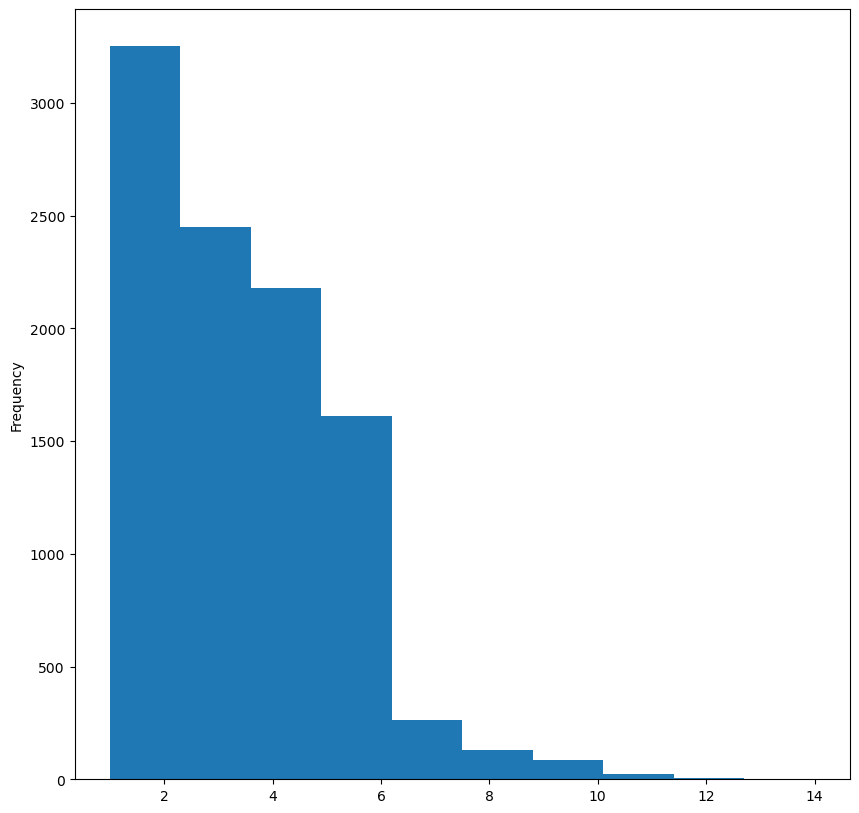

In [21]:
df_consumo['residentes_hogar'].plot.hist();

Alternativamente, podemos hacer un gráfico KDE , o Kernel Density Estimate, que produce una funcion estimada de la distribución de la variable ([Función de densidad de probabilidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad)).

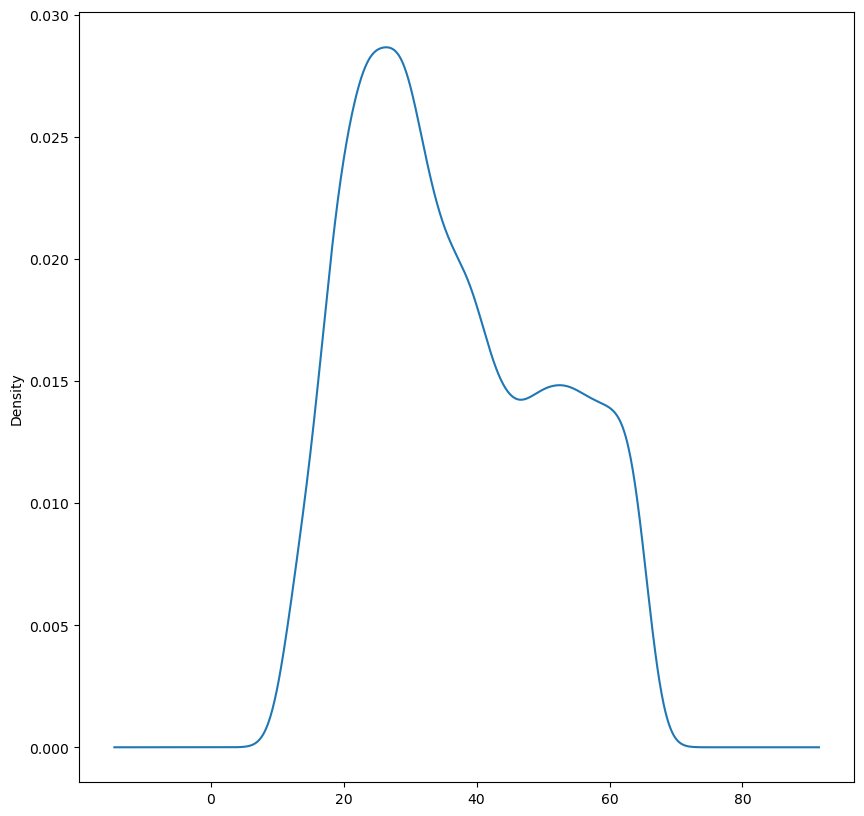

In [22]:
df_consumo['per_edad'].plot.kde();

In [23]:
def distribucion_variable_numerica(df, col):
    df[col].plot.kde()
    plt.xlabel('Distribucion de la variable {}'.format(col))
    plt.show()

Ahora podemos usar `pywidgets` para poder analizar las distribuciones más cómodamente. Tiene sentido hacer estos gráficos solo para variables numéricas. El método `pandas.select_dtypes` devuelve aquellas columnas de unos tipos específicos

In [24]:
columnas_numericas = df_consumo.select_dtypes(['int', 'float']).columns

In [25]:
from ipywidgets import interact, fixed

In [26]:
interact(distribucion_variable_numerica, col=columnas_numericas, df=fixed(df_consumo));

interactive(children=(Dropdown(description='col', options=('directorio', 'per_sexo', 'per_edad', 'vive_padre_h…

Vemos que las variables pese a ser numéricas no tiene una distribución equilibrada de valores, esto se debe a que todas están categorizadas.

In [27]:
df_consumo['per_edad'].value_counts(normalize=True)

29    0.0308
27    0.0305
25    0.0305
24    0.0301
30    0.0298
23    0.0287
22    0.0286
28    0.0284
18    0.0254
19    0.0250
31    0.0249
33    0.0246
21    0.0245
26    0.0245
20    0.0234
32    0.0226
40    0.0225
35    0.0210
34    0.0209
36    0.0203
38    0.0198
37    0.0196
39    0.0193
42    0.0180
50    0.0168
53    0.0158
65    0.0158
45    0.0156
56    0.0151
60    0.0151
52    0.0150
54    0.0150
63    0.0148
48    0.0148
17    0.0147
43    0.0147
62    0.0146
59    0.0143
57    0.0142
55    0.0140
49    0.0139
58    0.0134
46    0.0132
51    0.0131
47    0.0131
44    0.0129
41    0.0124
61    0.0121
64    0.0118
16    0.0117
15    0.0111
12    0.0102
14    0.0092
13    0.0079
Name: per_edad, dtype: float64

In [28]:
../../../media/dnormal.png

SyntaxError: invalid syntax (2401581896.py, line 1)

In [30]:
import statsmodels.api as sm
from scipy import stats

In [31]:
for num_col in columnas_numericas:
    _, pval = stats.normaltest(df_consumo[num_col])
    if(pval < 0.05):
        print("Columna {} no sigue una distribución normal".format(num_col))

Columna directorio no sigue una distribución normal
Columna per_sexo no sigue una distribución normal
Columna per_edad no sigue una distribución normal
Columna vive_padre_hogar no sigue una distribución normal
Columna vive_madre_hogar no sigue una distribución normal
Columna tipo_vivienda no sigue una distribución normal
Columna estrato no sigue una distribución normal
Columna residentes_hogar no sigue una distribución normal
Columna d_01_aporta_dinero_hogar no sigue una distribución normal
Columna d_02_situacion_actual no sigue una distribución normal
Columna d_08_estado_salud no sigue una distribución normal
Columna d_09_deprimido no sigue una distribución normal
Columna d_10_poco_interes no sigue una distribución normal
Columna d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente no sigue una distribución normal
Columna d_11_k_conocimiento_riesgo_cocaina_frecuentemente no sigue una distribución normal
Columna d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente no sigue una d

Con lo cual vemos que ninguna de las variables numéricas siguen una distribución normal debido a que pertenecen a una categoria.

### Distribución variables categóricas

Una manera de ver como se distribuyen las variables categóricas es mediante la función `pandas.value_counts`. Dicha función nos devuelve el numero de records existentes para cada valor de una columna

In [32]:
def distribucion_variable_categorica(col):
    df_consumo[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()

In [33]:
columnas_categoricas = df_consumo.select_dtypes(['object', 'category','int','float']).columns

In [34]:
interact(distribucion_variable_categorica, col=columnas_categoricas);

interactive(children=(Dropdown(description='col', options=('directorio', 'per_sexo', 'per_edad', 'vive_padre_h…

### Conclusiones

- Ninguna variable numérica sigue una distribución normal
- El rango de edad de los encuestados va desde los 18 hasta los 40
- El mayor número de personas encuestadas es en el departamento de Antioquia, el estrato 2 fue el mas concurrente, las personas adultas fueron las más concurrentes, el estrato bajo.